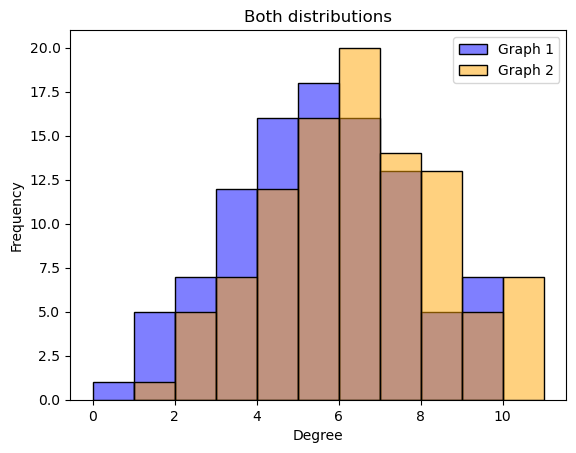

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

def plot_combined_degree_distribution(G1, G2, title):
    degrees1 = [G1.degree(n) for n in G1.nodes()]
    degrees2 = [G2.degree(n) for n in G2.nodes()]
    sns.histplot(degrees1, bins=range(min(degrees1), max(degrees1) + 1), kde=False, color='blue', label='Graph 1', alpha=0.5)
    sns.histplot(degrees2, bins=range(min(degrees2), max(degrees2) + 1), kde=False, color='orange', label='Graph 2', alpha=0.5)
    plt.title(title)
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
# Example graph before augmentation
G_before = nx.erdos_renyi_graph(100, 0.05)

# Example graph after augmentation (e.g., adding random edges)
G_after = G_before.copy()
G_after.add_edges_from([(u, v) for u, v in zip(range(50), range(50, 100))])

plot_combined_degree_distribution(G_before, G_after, 'Both distributions')

In [ ]:
def graph_statistics(G):
    return {
        'diameter': nx.diameter(G) if nx.number_connected_components(G) == 1 else float('inf'),
        'average_clustering': nx.average_clustering(G),
        'average_shortest_path_length': nx.average_shortest_path_length(G),
        'density': nx.density(G),
        'connected_components': nx.number_connected_components(G),
        'avg_connected_component_size': len(G) / nx.number_connected_components(G),
        'degree_assortativity': nx.degree_assortativity_coefficient(G) 
    }

print(graph_statistics(G_before))
print(graph_statistics(G_after))

NetworkXError: Found infinite path length because the graph is not connected

In [ ]:
def plot_combined_centrality(G1, G2, title):
    centralities1 = nx.degree_centrality(G1)
    centralities2 = nx.degree_centrality(G2)
    sns.histplot(list(centralities1.values()), bins=20, kde=False, color='blue', label='Graph 1', alpha=0.5)
    sns.histplot(list(centralities2.values()), bins=20, kde=False, color='orange', label='Graph 2', alpha=0.5)
    plt.title(title + ' - Degree Centrality')
    plt.xlabel('Centrality')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

    centralities1 = nx.eigenvector_centrality(G1)
    centralities2 = nx.eigenvector_centrality(G2)
    sns.histplot(list(centralities1.values()), bins=20, kde=False, color='blue', label='Graph 1', alpha=0.5)
    sns.histplot(list(centralities2.values()), bins=20, kde=False, color='orange', label='Graph 2', alpha=0.5)
    plt.title(title + ' - Eigenvector Centrality')
    plt.xlabel('Centrality')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

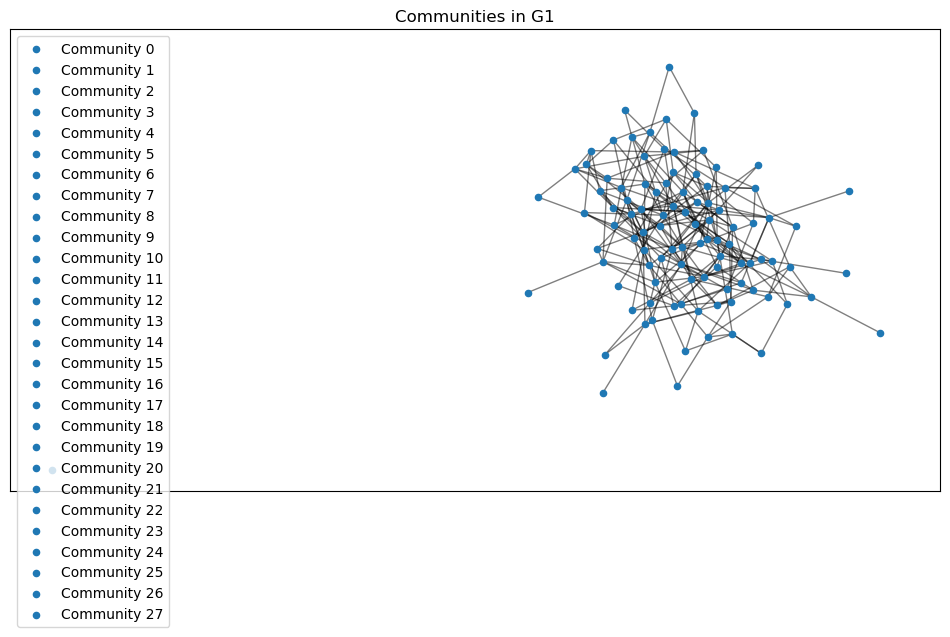

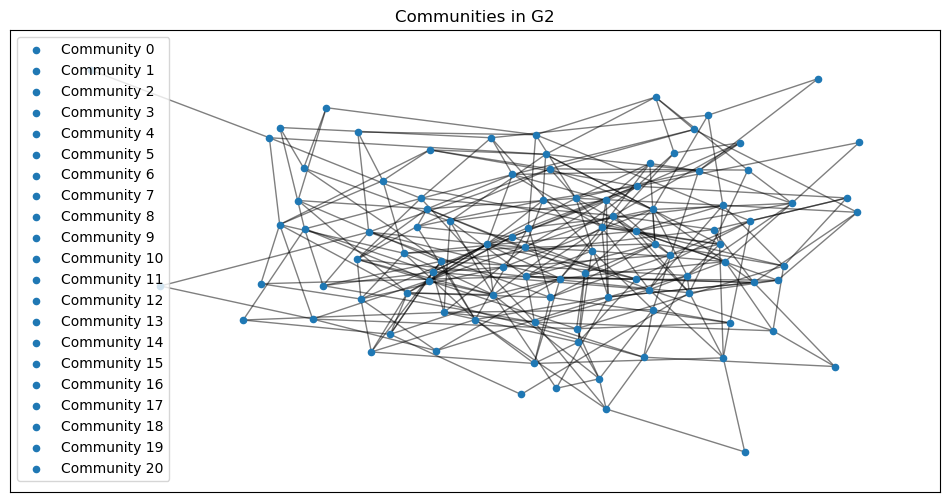

0.03571428571428571

In [14]:
def community_difference(G1, G2):
    communities1 = list(nx.algorithms.community.asyn_lpa_communities(G1))
    communities2 = list(nx.algorithms.community.asyn_lpa_communities(G2))
    
    # visualizations
    pos1 = nx.spring_layout(G1)
    pos2 = nx.spring_layout(G2)
    
    # Plot for G1
    plt.figure(figsize=(12, 6))
    for i, community in enumerate(communities1):
        nx.draw_networkx_nodes(G1, pos1, nodelist=community, node_size=20, label=f'Community {i}')
    nx.draw_networkx_edges(G1, pos1, alpha=0.5)
    plt.title('Communities in G1')
    plt.legend()
    plt.show()
    
    # Plot for G2
    plt.figure(figsize=(12, 6))
    for i, community in enumerate(communities2):
        nx.draw_networkx_nodes(G2, pos2, nodelist=community, node_size=20, label=f'Community {i}')
    nx.draw_networkx_edges(G2, pos2, alpha=0.5)
    plt.title('Communities in G2')
    plt.legend()
    plt.show()
    
    # community difference
    # convert to sets for faster intersection
    communities1 = [set(c) for c in communities1]
    communities2 = [set(c) for c in communities2]
    
    # compute intersection
    intersection = 0
    for c1 in communities1:
        for c2 in communities2:
            if c1 == c2:
                intersection += 1
                break
                
    return intersection / len(communities1)

# Example usage
community_difference(G_before, G_after)

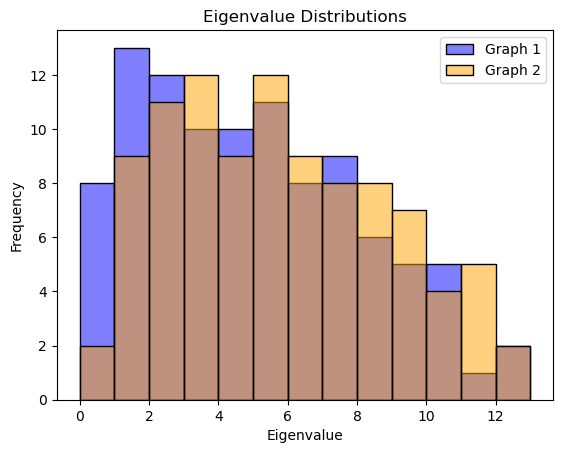

In [13]:
def compare_eigenvalue_distributions(G1, G2):
    eigenvalues1 = nx.laplacian_spectrum(G1)
    eigenvalues2 = nx.laplacian_spectrum(G2)
    # let's make sure the buckets are the same
    min_eigenvalue = min(min(eigenvalues1), min(eigenvalues2))
    max_eigenvalue = max(max(eigenvalues1), max(eigenvalues2))
    bins = range(int(min_eigenvalue), int(max_eigenvalue) + 1)
    sns.histplot(eigenvalues1, bins=bins, kde=False, color='blue', label='Graph 1', alpha=0.5)
    sns.histplot(eigenvalues2, bins=bins, kde=False, color='orange', label='Graph 2', alpha=0.5)
    plt.title('Eigenvalue Distributions')
    plt.xlabel('Eigenvalue')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

compare_eigenvalue_distributions(G_before, G_after)